In [187]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import urllib.request #to download image from internet
import cv2

In [188]:
from keras.models import load_model
cnn=load_model('CNN_final.h5')

In [189]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Turning on the webcam to identify my face

In [190]:
label=['Not Sang', 'Sang']
color_label=[(0,0,255),(0, 255, 0)]

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame= cap.read()
    face=face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=10)
    for(x,y,w,h)in face:
        roi_gray=frame[y:y+h, x:x+w]
        roi_gray=cv2.resize(roi_gray,(150,150))
        i=cnn.predict(np.array([roi_gray])).argmax()
        #do sth
        cv2.rectangle(frame, (x, y), (x + w, y + h), color_label[i], 5)
        cv2.putText(frame, label[i], (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255) )
    
    cv2.imshow('cak', frame)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

In [207]:
cap.release()
cv2.destroyAllWindows()

# Use our trained model to detect some others's picture

In [191]:
def download_image_ipg(url, file_path, file_name):
    fullpath=file_path+file_name+".png"
    urllib.request.urlretrieve(url,fullpath)

In [201]:
url='https://scontent.fsgn8-1.fna.fbcdn.net/v/t1.0-9/124823792_187947159575779_8741517614377766055_o.jpg?_nc_cat=102&ccb=2&_nc_sid=730e14&_nc_ohc=9IG9Zw8xvv4AX9prjyZ&_nc_ht=scontent.fsgn8-1.fna&oh=2a538aa4725f63d59f9509d214be86b0&oe=5FEF8DFD'
download_image_ipg(url,'', 'data2')

In [202]:
img=cv2.imread('data2.png')

In [203]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.15, 4)
#
for (x, y, w, h) in faces:
    print(x,y,w,h)
    roi_gray=gray[y:y+h, x:x+w]
    roi_gray=cv2.resize(roi_gray,(150,150))
    cv2.imwrite("data.png",roi_gray)
    roi_gray=cv2.imread('data.png')
    i=cnn.predict(np.array([roi_gray])).argmax()
    cv2.rectangle(img, (x, y), (x + w, y + h), color_label[i], 5)
    cv2.putText(img, label[i], (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255) )

708 545 158 158


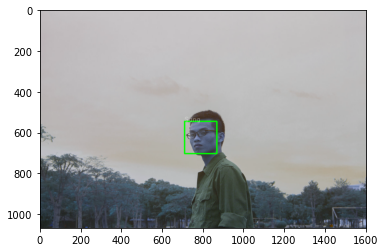

In [204]:
plt.imshow(img)

In [205]:
cv2.imwrite("data.png",img)

True